## Imports

In [1]:
# basic imports
import os 
import glob

# sci python and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# model selection and performance
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,chi2

#modelsw
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# decorations
from IPython.display import YouTubeVideo

import warnings
warnings.filterwarnings('ignore')

np.random.seed(2)

In [2]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',680)

In [3]:
glob.glob('*')

['1_Pure_Truncation_Start_Bal_Ella_Version2-editedJulia.ipynb',
 '3_individual_outcome_determination.ipynb',
 '5_format_data.ipynb',
 'loan_outcomes_33_150.csv',
 '7_MLexplore.ipynb',
 'individual_outcomes_33_150.csv',
 'binary_train.csv',
 'all_data.csv',
 'binary_test.csv',
 'data_merged_noMissingData.csv',
 'data.csv',
 '4_merge_predictors_with_outcome.ipynb',
 '2_loan_outcome_determination.ipynb',
 'diaries_trx_trunc_loans_start_bal.csv',
 'binary_y_train.csv',
 'Pure_Truncation_Start_Bal_Ella_Version2.ipynb',
 '6_train_test_split.ipynb',
 'data_merged_nocatvars.csv',
 'heatmap.jpg',
 'binary_x_train.csv',
 'binary_x_test.csv',
 'binary_y_test.csv']

In [4]:
x_train = pd.read_csv('binary_x_train.csv')
x_test  = pd.read_csv('binary_x_test.csv')
y_train = pd.read_csv('binary_y_train.csv')
y_test  = pd.read_csv('binary_y_test.csv')

In [5]:
x_train.shape

(91, 124)

In [9]:
x_train.owner_score.head(10)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    0.0
8    1.0
9    1.0
Name: owner_score, dtype: float64

In [7]:
y_train.shape

(91, 1)

In [8]:
y_train.head(10)

owner_score_bin
0                1
1                1
2                1
3                1
4                1
5                1
6                1
7                0
8                1
9                1

In [10]:
x_train = x_train.drop(['owner_score'], axis = 1)
x_test  = x_test.drop(['owner_score'], axis = 1)

In [11]:
y_train.columns = ['outcome']
y_test.columns = ['outcome']

## Associations: 

In [12]:
associations = pd.concat([x_train,y_train], axis=1)

In [13]:
associations.outcome.value_counts(normalize=True)

1    0.791209
0    0.208791
Name: outcome, dtype: float64

In [14]:
# corr = associations[associations.columns].corr()
# plt.figure(figsize=(30, 30))
# sns.heatmap(corr, annot = True, cmap='coolwarm')

## It appears that there is a lot of correlation among a few features; this makes sense b/c some are mean, some are median measures of the same thing. Let's only keep one of those for now & redo the correlation plot: 

In [15]:
med_cols = [col for col in x_train.columns if 'med' in col]
med_cols

['con_pur_hh_medpti_x',
 'con_pur_hh_medpti_ALC',
 'con_pur_hh_medpti_CLN',
 'con_pur_hh_medpti_CLTH',
 'con_pur_hh_medpti_COMM',
 'con_pur_hh_medpti_EDU',
 'con_pur_hh_medpti_ENRGY',
 'con_pur_hh_medpti_ENT',
 'con_pur_hh_medpti_FOOD',
 'con_pur_hh_medpti_H20',
 'con_pur_hh_medpti_HSNG',
 'con_pur_hh_medpti_MED',
 'con_pur_hh_medpti_OTH',
 'con_pur_hh_medpti_PERS',
 'con_pur_hh_medpti_REL',
 'con_pur_hh_medpti_TRNSP',
 'inc_hh_medianpti',
 'con_pur_hh_medpti_y',
 'con_prod_hh_medpti',
 'con_hh_medpti']

In [16]:
x_train = x_train.drop(med_cols, axis = 1)
x_test  = x_test.drop(med_cols, axis = 1)

In [17]:
associations = pd.concat([x_train,y_train], axis=1)

In [18]:
associations.outcome.value_counts(normalize=True)

1    0.791209
0    0.208791
Name: outcome, dtype: float64

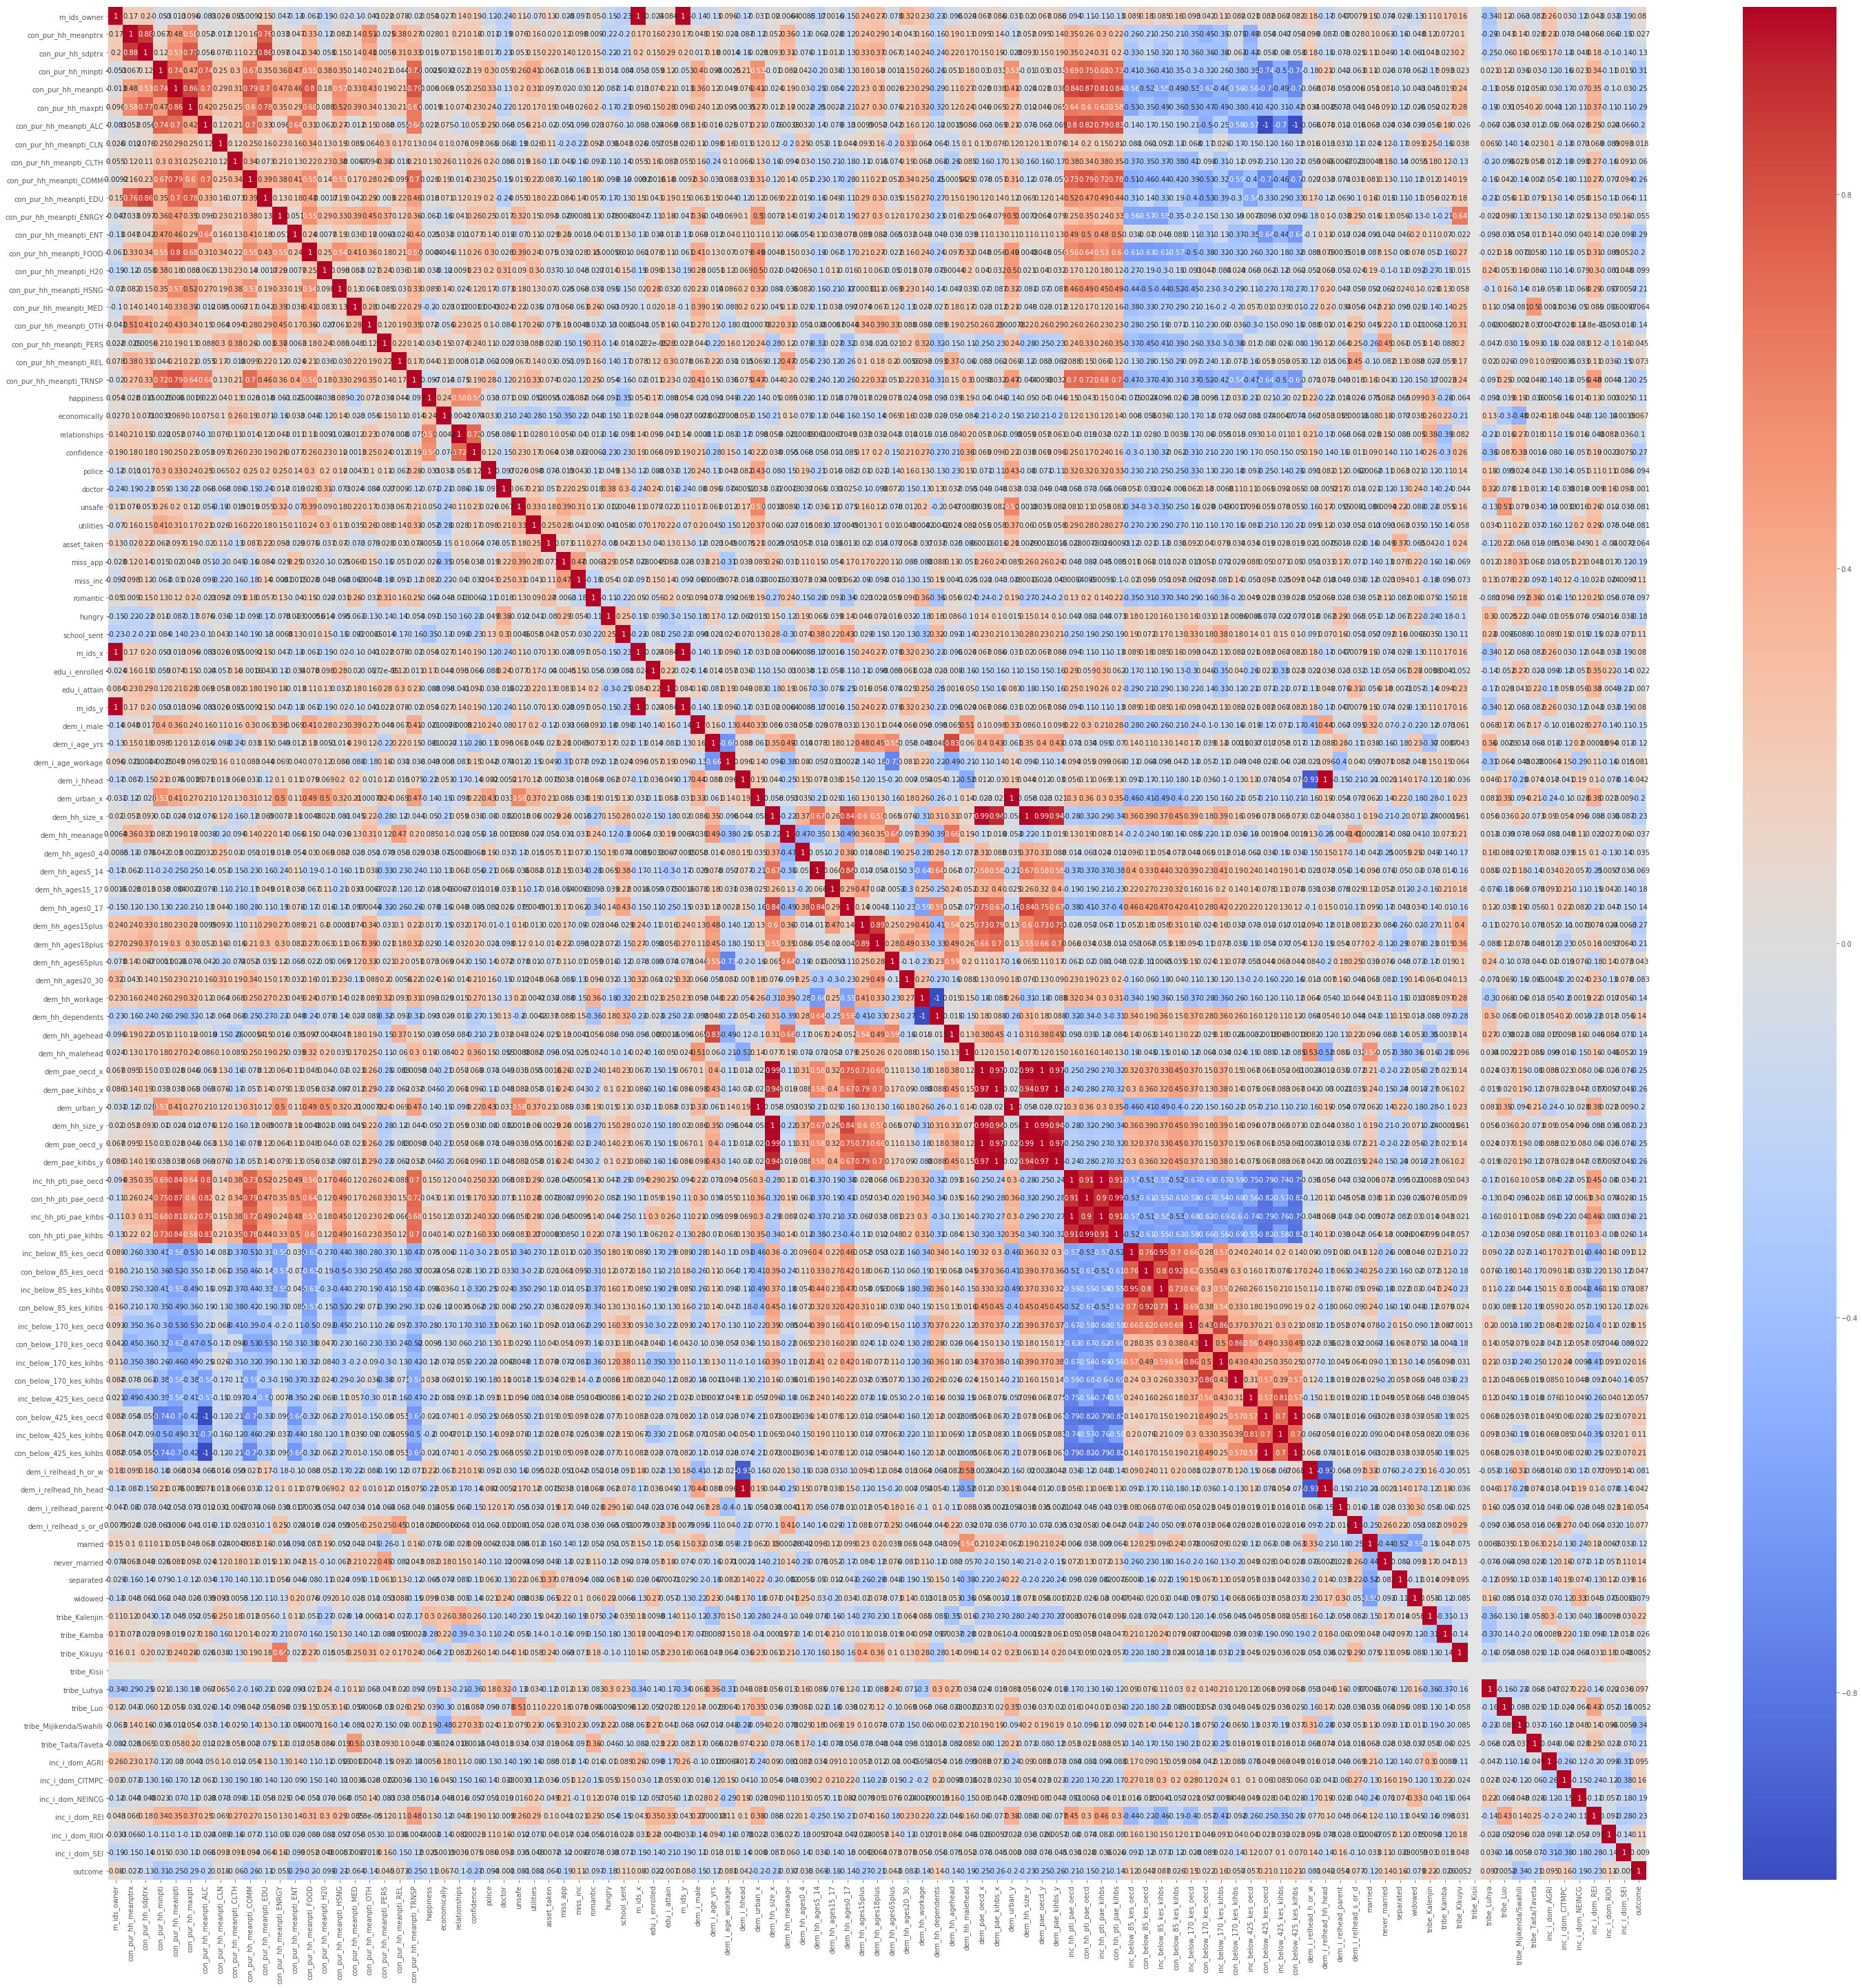

In [19]:
corr = associations[associations.columns].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.savefig('heatmap.jpg')

## Feature selection: 

We may not have to do this, but let's see what pops out: 

In [20]:
x_train.shape

(91, 103)

In [21]:
x_train.dtypes[x_train.dtypes=='object']

hh_ids    object
dtype: object

In [22]:
x_train_hhids = x_train.hh_ids
x_train_m_ids = x_train.m_ids_owner

In [23]:
x_train_drop = x_train.drop(['hh_ids', 'm_ids_owner'], axis =1)

In [24]:
from sklearn.feature_selection import *

In [25]:
select_top_20 = SelectKBest(score_func=f_classif, k = 20)
fit = select_top_20.fit(x_train_drop,y_train)
features_20 = fit.transform(x_train_drop)


In [26]:
feat_scores = pd.DataFrame()
feat_scores["F Score"] = select_top_20.scores_
feat_scores["P Value"] = select_top_20.pvalues_
feat_scores["Support"] = select_top_20.get_support()
feat_scores["Attribute"] = x_train_drop.columns

In [27]:
feat_scores.sort_values("Support", ascending = False).head(20)

F Score   P Value  Support                 Attribute
50   4.123192  0.045284     True         dem_hh_ages18plus
93  11.493935  0.001043     True   tribe_Mijikenda/Swahili
58   6.494253  0.012537     True           dem_pae_kihbs_x
60   4.873665  0.029841     True             dem_hh_size_y
61   6.033935  0.015975     True            dem_pae_oecd_y
49   6.778812  0.010808     True         dem_hh_ages15plus
62   6.494253  0.012537     True           dem_pae_kihbs_y
63   4.099794  0.045885     True       inc_hh_pti_pae_oecd
43   4.873665  0.029841     True             dem_hh_size_x
23   6.940611  0.009937     True                confidence
87   4.406301  0.038638     True            tribe_Kalenjin
19   5.959718  0.016616     True  con_pur_hh_meanpti_TRNSP
14   4.040776  0.047441     True   con_pur_hh_meanpti_HSNG
57   6.033935  0.015975     True            dem_pae_oecd_x
8    6.355084  0.013486     True   con_pur_hh_meanpti_COMM
2    9.530837  0.002694     True         con_pur_hh_minpti
3    5.906550  0.017092     True        con_pur_hh_meanpti
11   8.127864  0.005417     True    con_pur_hh_meanpti_ENT
4    7.921205  0.006014     True         con_pur_hh_maxpti
98   4.997193  0.027890     True             inc_i_dom_REI

## Interesting. Ok let's do some modeling and see what happens: 

In [28]:
# create a list of models that you'd like to try
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [29]:
cross_val_score?

In [31]:
# for each model, do 5-fold cross-validation and record the mean accuracy
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=5, random_state=10) 
    score = cross_val_score(model, x_train_drop, y_train, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.702339
1  SVC  0.790643
2   LR  0.790643
3   DT  0.692398
4  GNB  0.725146
5   RF  0.725146
6   GB  0.780702


3 models had nearly identical top-end performance. To narrow things down further, a good approach  would be to look at standard deviations for the scores. 

In [32]:
# for each model, do 5-fold cross-validation and record the accuracy for each fold
# this way we can see variations in performance across the folds
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=5, random_state=10) 
    score = cross_val_score(model, x_train_drop, y_train, cv=kfold, scoring='accuracy')
    
    names.append(name)
    scores.append(score)


[Text(0,0,'KNN'),
 Text(0,0,'SVC'),
 Text(0,0,'LR'),
 Text(0,0,'DT'),
 Text(0,0,'GNB'),
 Text(0,0,'RF'),
 Text(0,0,'GB')]

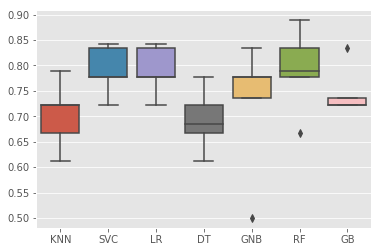

In [33]:
ax = sns.boxplot(data=scores)
ax.set_xticklabels(names)

[Text(0,0,'KNN'),
 Text(0,0,'SVC'),
 Text(0,0,'LR'),
 Text(0,0,'DT'),
 Text(0,0,'GNB'),
 Text(0,0,'RF'),
 Text(0,0,'GB')]

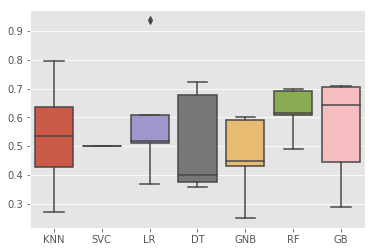

In [34]:
# Exactly the same as above, but using the area under the receiver operating characteristic curve
# as the score. 
# Make sure to pick the score that you feel is best suited for your particular problem
# see here for a list of evaluation scoring options: https://scikit-learn.org/stable/modules/model_evaluation.html
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=5, random_state=10) 
    score = cross_val_score(model, x_train_drop, y_train, cv=kfold, scoring='roc_auc')
    
    names.append(name)
    scores.append(score)
ax = sns.boxplot(data=scores)
ax.set_xticklabels(names)

ROC and accuracy are very similar.

Notice that roc produces tighter boxes (less variance in performance) than accuracy does. Why is that?

Let's look at SVC, GB, and RF classification reports. Incidently, these SVC/GB/ or SVC/RF would make a great ensemble, we presume that they are modeling very different things

# Examine the results of each model on train data

Pick the model that best suits your needs, those might not be highest accuracy

In [35]:
svc_model = SVC()
svc_model.fit(x_train_drop, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(x_train_drop,y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_drop,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [36]:
svc_train_predict = svc_model.predict(x_train_drop)
rf_train_predict = rf_model.predict(x_train_drop)
gb_train_predict = gb_model.predict(x_train_drop)

In [37]:
print(classification_report(y_train,svc_train_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00        91



In [38]:
print(classification_report(y_train,rf_train_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00        91



In [39]:
print(classification_report(y_train,gb_train_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00        91

